In [62]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax


Text(0.5, 0, 'Number of quanta per person (N)')

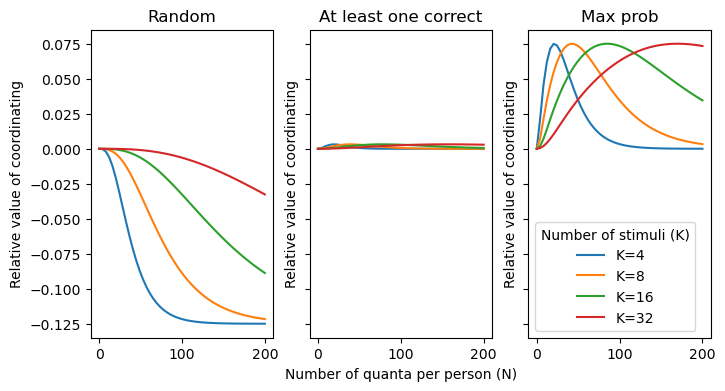

In [64]:
# Define the memory function 
def prob_remember(num_quanta, baseline_prob=0.5, mem_slope=0.2):
    """
    Calculate probability of remembering based on number of memory quanta.
    
    Args:
        num_quanta: int or array-like, number of memory quanta
        baseline_prob: float, baseline probability (default: 0.5)
        mem_slope: float, memory slope parameter (default: 0.1)
    
    Returns:
        float or array-like: probability of remembering
    """
    return baseline_prob + 1 / (1 + np.exp(-mem_slope * num_quanta)) * (1 - baseline_prob)

# define a function which takes in two probabilities and returns the probability of at least one of them happening
def prob_either(prob1, prob2):

    return 1 - (1 - prob1) * (1 - prob2)

# define function which returns beta softmax
def softargmax(prob1, prob2,   beta):
    values = np.array([prob1, prob2])
    return np.dot(values, softmax(values * beta))


# value of coordinating - take in number of stimuli (K) and number of memory quanta per person (N)
def benefit_coord(K, N, reward_func, baseline_prob=0.5, mem_slope=0.1):
    return reward_func(prob_remember(N/(K/2)), prob_remember(0))

def benefit_noncoord(K, N, reward_func, baseline_prob=0.5, mem_slope=0.1):
    return reward_func(prob_remember(N/K), prob_remember(N/K))

def rel_value_coord(K, N, reward_func, baseline_prob=0.5, mem_slope=0.1):
    return benefit_coord(K, N, reward_func) - benefit_noncoord(K, N, reward_func)

# define inline function for softargmax with beta set to 10
softargmax_10 = lambda prob1, prob2: softargmax(prob1, prob2, 0)

# plot the value of coordinating as a function of N for different values of K
N_vals = np.linspace(0, 200, 50)
K_vals = [4, 8, 16, 32]
softmax_vals = [0, 10] # 0 will be random choice, 10 will be max


max_person_rew = lambda prob1, prob2: softargmax(prob1, prob2, 50)
random_person_rew = lambda prob1, prob2: softargmax(prob1, prob2, 0)

rew_funcs = [random_person_rew, prob_either, max_person_rew]

fig, ax = plt.subplots(1, len(rew_funcs), figsize=(8, 4), sharey = True)
val_coord = np.zeros((len(rew_funcs), len(K_vals), len(N_vals)))


for RF_idx, RF in enumerate(rew_funcs):
    for K_idx, K in enumerate(K_vals):
        for N_idx, N in enumerate(N_vals):
            val_coord[RF_idx, K_idx, N_idx] = rel_value_coord(K, N, RF)

for RF_idx, RF in enumerate(rew_funcs):
    for K_idx, K in enumerate(K_vals):
        ax[RF_idx].plot(N_vals, val_coord[RF_idx, K_idx, :], label=f'K={K}')

    ax[RF_idx].set_ylabel('Relative value of coordinating')

ax[0].set_title("Random")
ax[1].set_title("At least one correct")
ax[2].set_title("Max prob")
ax[2].legend(title = 'Number of stimuli (K)')
ax[1].set_xlabel('Number of quanta per person (N)')




Text(0, 0.5, 'Probability of remembering')

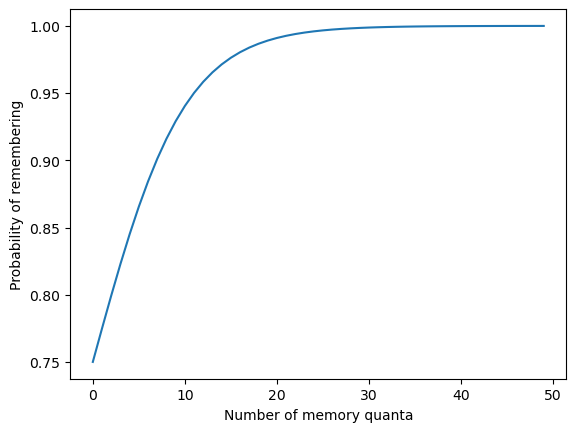

In [58]:
# plot prob remember, varying num quanta from 0 to 100
num_quanta = np.arange(0, 50)
prob = prob_remember(num_quanta)
fig,ax = plt.subplots()
ax.plot(num_quanta, prob)
ax.set_xlabel('Number of memory quanta')
ax.set_ylabel('Probability of remembering')